
# **Red neuronal totalmente conectada MNIST en Keras**
Inspirado en [**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/).

Treball de Recerca d'Arnau Ayguadé. Institut Front Marítim. Barcelona

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

## 1. Carga de los datos de MNIST

Primero vamos a cargar los datos de entrada de mnist

In [ ]:
mnist = datasets.mnist

(xo_train, yo_train), (xo_test, yo_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Para poder hacer el estudio de la influencia del tamaño del dataset, las siguientes lineas se quedan con un subconjunto del dataset original (xo_, yo_) con trainsize elementos a utilizar para el entrenamiento y testsize elementos para la validacion:

In [ ]:
trainsize = 60000
testsize  = 10000 
x_train = xo_train[0:trainsize]
x_test  = xo_test[0:testsize]

y_train = yo_train[0:trainsize]
y_test  = yo_test[0:testsize]

## 2. Preprocesado de datos de MNIST para una red neuronal

Para normalizar las muestras de entrada dividimos cada valor por el maximo (255), obteniendo asi datos en el rango 0 y 1 (como numeros reales en 32 bits). A continuación se convertiran de forma 2D a 1D (vector de 28x28 atributos, es decir, 784) para poder ser usados en nuestra red fully connected. 

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train = x_train.reshape(trainsize, 784)
x_test = x_test.reshape(testsize, 784)

En cuanto a las etiquetas de salida, la transformación que realizaremos es convertirlas en un vector de categorias, con 10 posibles categorias. Cada muestra tendra activa una unica categoria, la que corresponde al valor de la etiqueta:

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## 3. Definición del modelo

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense # totalmente concectadas

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
#model.add(Dense(10, activation='softmax', input_shape=(784,)))

Aqui se podrian hacer varias pruebas cambiando el numero de neuronas en la primera capa (por ejemplo: 10, 32, 64, 128, 256, 512) y ver como afecta al comportamiento del modelo tanto en el entrenamiento como en la prediccion. Tambien ver como afecta el uso de distintas funciones de activacion: sigmoid, relu, ... Incluso podria analizarse el uso de una capa adiocional.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## 4. Configuración del proceso de aprendizaje

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

Aqui podriamos probar con optimizadores distintos: adagrad, rmsprop, ...

## 5. Entrenamiento del modelo y su evaluación

Podemos entrenar el modelo haciendo una pasada (epochs=1) por los datos de entrenamiento x_train e y_train:

In [ ]:
model.fit(x_train, y_train)

1875/1875 [==============================] - 9s 3ms/step - loss: 1.8649 - accuracy: 0.5098


Observar que la exactitud (accuracy) del modelo es baja. Podemos evaluar el modelo con datos que nunca ha "visto":

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4949 - accuracy: 0.6953


La exactitud con los datos de test es mas aceptable. Si hacemos que el modelo "vea" los datos de entrenamiento multiples veces conseguiremos aumentar rapidamente la precisión del modelo. Esto se hace con el parametro epochs, que define el numero de veces que se entrena el modelo con todo el dataset seleccionado.

In [ ]:
model.fit(x_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2761 - accuracy: 0.7386
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9706 - accuracy: 0.7998
Epoch 3/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7965 - accuracy: 0.8297
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6875 - accuracy: 0.8467


Y evaluamos de nuevo el modelo tras haber sido entrenado con los mismos datos de test varias veces veremos como ha mejorado su exactitud:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6386 - accuracy: 0.8595


Podemos hacer 5 epochs mas para hacer un total de 10 visitas en total de los datos de entrenamiento y ver como van evolucionando ambas métricas. Interesante ver como mejoracambiando el numero de epochs.

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6141 - accuracy: 0.8576
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5615 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5222 - accuracy: 0.8719
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4915 - accuracy: 0.8768
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4669 - accuracy: 0.8815


Y evaluamos de nuevo el modelo tras haber sido entrenado con los mismos datos de test varias veces veremos como ha mejorado su exactitud:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4503 - accuracy: 0.8887
Test accuracy: 0.888700008392334


## 6. Representación grafica de la curva de aprendizaje

Veamos de forma grafica la evolucion del aprendizaje. Para ello introducimos dos conceptos: aprendizaje por "batches" y "validation_split". No se debe confundir con el concepto de epochs que ya hemos introducido. Con el primero le diremos que no actualice los pesos de la red para cada muestra de entrada sino cada cierto numero de entradas. Con el segundo le diremos que utilice los datos de entrammiento para ir tambien validando el proceso de aprendizaje. Por ejemplo con batch_size=100 modificara pesos 60000/100 veces, es decir, 600 veces. Con un validation_split=0.2 hara que de las 600 solo 600x0.8=480 sean de aprendizaje y 600x0.2=120 sean de validacion (no se usan para entrenar).

Definimos de nuevo el modelo, el proceso de aprendizaje y entrenamos por 50 epochs:

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=50)

Epoch 1/50
600/600 [==============================] - 3s 4ms/step - loss: 2.1305 - accuracy: 0.3499 - val_loss: 1.9486 - val_accuracy: 0.5172
Epoch 2/50
600/600 [==============================] - 2s 4ms/step - loss: 1.8241 - accuracy: 0.5445 - val_loss: 1.6934 - val_accuracy: 0.5890
Epoch 3/50
600/600 [==============================] - 2s 4ms/step - loss: 1.5986 - accuracy: 0.6218 - val_loss: 1.4881 - val_accuracy: 0.6596
Epoch 4/50
600/600 [==============================] - 2s 4ms/step - loss: 1.4136 - accuracy: 0.6822 - val_loss: 1.3199 - val_accuracy: 0.7148
Epoch 5/50
600/600 [==============================] - 2s 4ms/step - loss: 1.2623 - accuracy: 0.7248 - val_loss: 1.1832 - val_accuracy: 0.7510
Epoch 6/50
600/600 [==============================] - 2s 4ms/step - loss: 1.1390 - accuracy: 0.7554 - val_loss: 1.0722 - val_accuracy: 0.7784
Epoch 7/50
600/600 [==============================] - 2s 4ms/step - loss: 1.0381 - accuracy: 0.7803 - val_loss: 0.9807 - val_accuracy: 0.7955
Epoch 

Y finalmente visualizamos la evolución de la exactitud con las epochs:

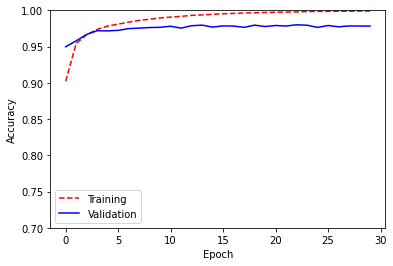

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):     
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],'r--',
           label='Training')
  plt.plot(hist['epoch'], hist['val_accuracy'],'b',
           label = 'Validation')
  plt.ylim([0.7,1])
  plt.legend()
  plt.show()

plot_history(history)

## *7*. La matriz de confusión: como se decide la clasificación

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Note, this code is taken straight from the SKLEARN website, 
# a nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

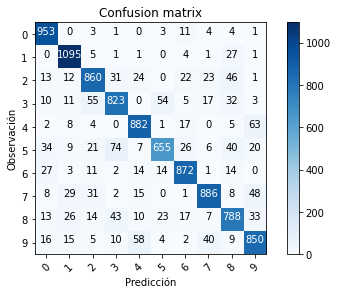

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))